#### <h1> <center> ENGG680 </center></h1>
<h2> <center> Project (47 points)</center></h2>
<center>
<div class="alert alert-block alert-info">
Due: Friday April 22 (midnight). To be submitted on D2L.
</div></center>

Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`. Test your code and when you were done, download this notebook as an `.ipynb` file and submit it to D2L. To get this file, in Jupyter notebook you can go to File -> Download as -> Notebook(.ipynb)

# Accident Prediction
The goal of this project is to get familiar with data wrangling and prepare a machine learning model to have an inital prediction by using real world data set.

Two data set of accident information of Calgary (Traffic_Incidents.csv) and (weather.csv) are given for this prediction.


### Dependencies Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
from sklearn.linear_model import LinearRegression

### Import Traffic_Incidents.csv and set START_DT in csv file as index (1 pts)

In [2]:
#traffic_incidents_df = pd.read_csv('Traffic_Incidents.csv', index_col='START_DT')
traffic_incidents_df = pd.read_csv('Traffic_Incidents.csv')
traffic_incidents_df['START_DT']=pd.to_datetime(traffic_incidents_df['START_DT'])
print(traffic_incidents_df[['START_DT', 'INCIDENT INFO']])

                 START_DT                                      INCIDENT INFO
0     2022-01-31 17:43:04      Eastbound 16 Avenue approaching 19 Street NE 
1     2022-03-11 17:31:13       Southbound Sarcee Trail at Richmond Road SW 
2     2022-01-31 17:43:04      Eastbound 16 Avenue approaching 19 Street NE 
3     2022-02-24 18:39:51                         32 Avenue and 4 Street NW 
4     2022-03-29 19:18:43                        60 Street and 96 Avenue NE 
...                   ...                                                ...
31102 2018-04-24 19:51:23                     52 Street and Mahogany Gate SE
31103 2018-05-23 19:27:49                         17 Avenue and 29 Street SW
31104 2018-03-13 19:40:11          Southbound Centre Street and 18 Avenue NE
31105 2022-01-13 14:54:04   Eastbound Memorial Drive approaching Deerfoot...
31106 2022-01-13 15:18:52              Memorial Drive and Deerfoot Trail SE 

[31107 rows x 2 columns]


### Filter "INCIDENT INFO" (i.e. only keep ICIDENT INFO column and drop other columns from dataframe) (1 pts)

In [3]:
traffic_incidents_df = traffic_incidents_df[['START_DT', 'INCIDENT INFO']].drop_duplicates().reset_index(drop=True)
print(traffic_incidents_df)

                 START_DT                                      INCIDENT INFO
0     2022-01-31 17:43:04      Eastbound 16 Avenue approaching 19 Street NE 
1     2022-03-11 17:31:13       Southbound Sarcee Trail at Richmond Road SW 
2     2022-02-24 18:39:51                         32 Avenue and 4 Street NW 
3     2022-03-29 19:18:43                        60 Street and 96 Avenue NE 
4     2022-01-31 18:38:50          Northbound 69 Street at Sirocco Drive SW 
...                   ...                                                ...
30100 2018-04-24 19:51:23                     52 Street and Mahogany Gate SE
30101 2018-05-23 19:27:49                         17 Avenue and 29 Street SW
30102 2018-03-13 19:40:11          Southbound Centre Street and 18 Avenue NE
30103 2022-01-13 14:54:04   Eastbound Memorial Drive approaching Deerfoot...
30104 2022-01-13 15:18:52              Memorial Drive and Deerfoot Trail SE 

[30105 rows x 2 columns]


### Check and drop null values from dataset if exist (1 pts)

In [4]:
check_for_nan = traffic_incidents_df.isnull().values.any() #['INCIDENT INFO']
print("Is any null values in modified dataset present: ", check_for_nan)

Is any null values in modified dataset present:  False


In [5]:
def lineplot(x_list, y_list, x_label, y_label, title, colors):
    plt.style.use('fivethirtyeight')
    plt.plot(x_list, y_list, color=colors)
    plt.xlabel(x_label)
    plt.xticks(rotation=90)
    plt.ylabel(y_label)
    plt.title(title)
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.show()
    
def lineplot1(x_list, y_list, x_label, y_label, title, colors):
    plt.style.use('fivethirtyeight')
    plt.plot(x_list, y_list, color=colors)
    plt.xlabel(x_label)
    plt.xticks(rotation=90) 
    plt.xticks(ticks = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250], 
               labels=['2017-31', '2018-13', '2018-31', '2019-10', '2019-41', 
                       '2020-17', '2020-39', '2021-14', '2021-37', '2022-12'])
    plt.ylabel(y_label)
    plt.title(title)
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.show()
    
def barplot(x_list, y_list, x_label, y_label, title, colors):
    plt.style.use('fivethirtyeight')
    plt.bar(x_list, y_list, label='Max', width=0.5, color=colors)
    plt.xlabel(x_label)
    plt.xticks(rotation=90)
    plt.ylabel(y_label)
    plt.title(title)
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.show()
    
def lineplotMultiple(x_list, y_list1, y_list2, x_label, y_label, title, label):
    plt.style.use('fivethirtyeight')
    plt.plot(x_list, y_list1, label=label[0], color="#444444")
    plt.plot(x_list, y_list2, label=label[1], color="#008fd5")
    plt.xlabel(x_label)
    plt.xticks(rotation=90)
    plt.ylabel(y_label)
    plt.title(title)
    # plt.fill_between(x_list, y_list1, interpolate=True, alpha=0.20)
    plt.legend()
    #plt.tight_layout()
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.show()
    
def scatterplot(x_list, y_list, x_label, y_label, title):
    plt.style.use('fivethirtyeight')
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x_list, y_list, s=25, color="#444444")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.show()

### plot daily accident counts (3 Pts)

START_DT
2016-12-06    11
2016-12-07    24
2016-12-08    27
2016-12-09    41
2016-12-10    40
              ..
2022-03-30    11
2022-03-31    18
2022-04-01    15
2022-04-02    11
2022-04-03     5
Name: INCIDENT INFO, Length: 1788, dtype: int64


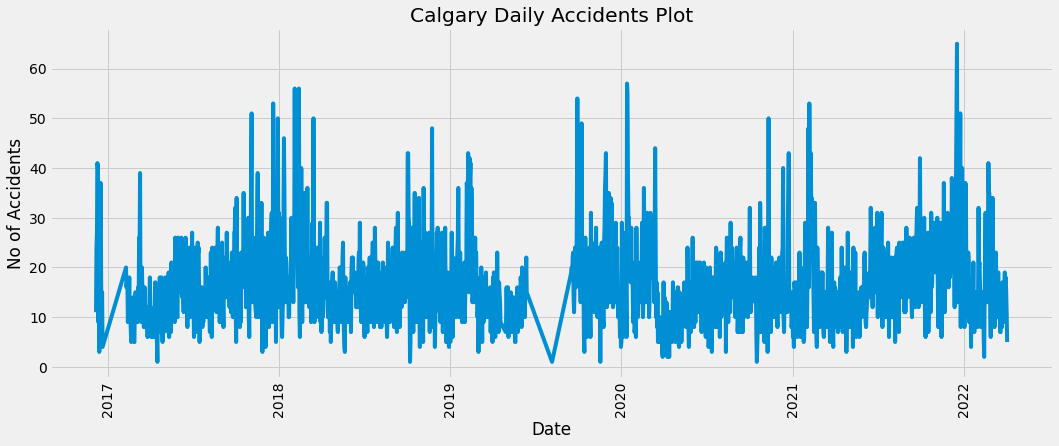

In [16]:
daily_accident_count_df = traffic_incidents_df.groupby(traffic_incidents_df['START_DT'].dt.date)['INCIDENT INFO'].count()
print(daily_accident_count_df)
 

lineplot(x_list = daily_accident_count_df.index,
         y_list = daily_accident_count_df,
         x_label = "Date", y_label = "No of Accidents",
         title = "Calgary Daily Accidents Plot",
         colors = '#008fd5')

### plot weekly accident counts (3 Pts)

             INCIDENT INFO
week number               
2016-49                152
2016-50                145
2016-51                 19
2017-10                138
2017-11                 84
...                    ...
2022-5                 123
2022-6                  76
2022-7                 137
2022-8                 177
2022-9                 146

[259 rows x 1 columns]


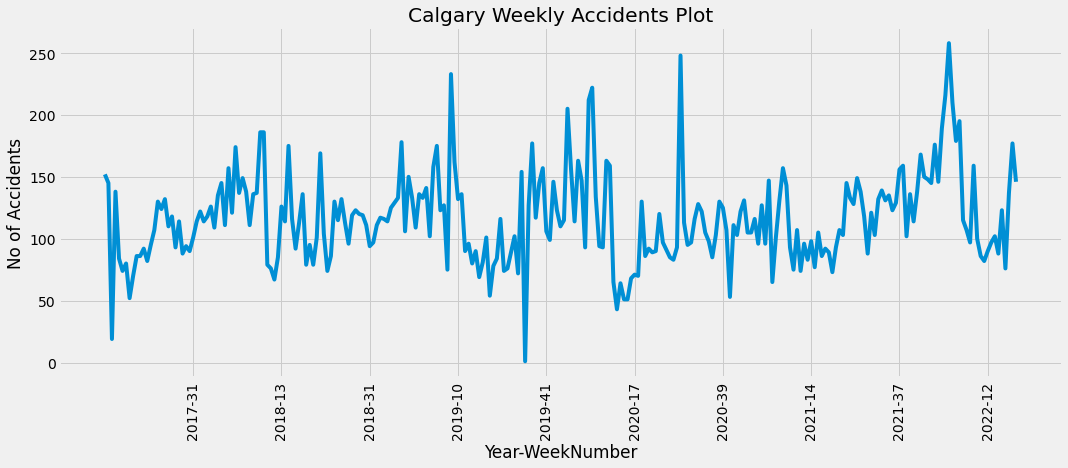

In [7]:
weekly_accident_count_df = daily_accident_count_df.reset_index()
weekly_accident_count_df['START_DT']=pd.to_datetime(weekly_accident_count_df['START_DT'])

weekly_accident_count_df['week number'] = weekly_accident_count_df['START_DT'].dt.isocalendar().year.astype(str) + '-' + \
                                         weekly_accident_count_df['START_DT'].dt.isocalendar().week.astype(str)

 
weekly_accident_count_df = weekly_accident_count_df[['INCIDENT INFO', 'week number']]
weekly_accident_count_df = weekly_accident_count_df.groupby(weekly_accident_count_df['week number']).sum()
print(weekly_accident_count_df)

lineplot1(x_list = weekly_accident_count_df.index,
         y_list = weekly_accident_count_df['INCIDENT INFO'],
         x_label = "Year-WeekNumber", y_label = "No of Accidents",
         title = "Calgary Weekly Accidents Plot",
         colors = '#008fd5')


### plot the average traffic as a function of the time of the day and explain your observation ( 6 pts: 4 pts code + 2 pts your observation)

24 Hour
0      481
1      360
2      278
3      221
4      254
5      307
6      832
7     1522
8     1758
9     1581
10    1334
11    1362
12    1521
13    1515
14    1826
15    2295
16    2698
17    2802
18    2116
19    1570
20    1122
21     883
22     812
23     655
Name: INCIDENT INFO, dtype: int64


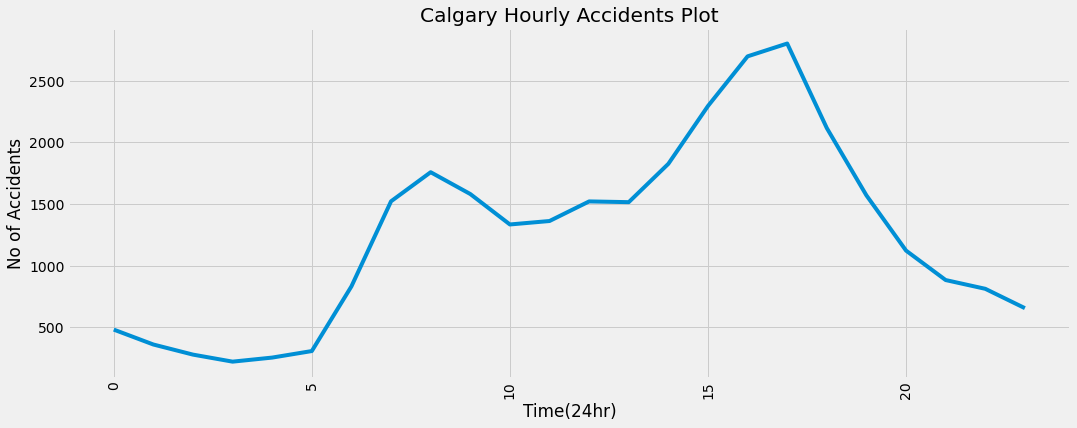

In [8]:
accidents_byhour_df = traffic_incidents_df.groupby(traffic_incidents_df['START_DT'].dt.hour)['INCIDENT INFO'].count()
accidents_byhour_df.index.names = ['24 Hour']
print(accidents_byhour_df)
        
lineplot(x_list = accidents_byhour_df.index,
         y_list = accidents_byhour_df,
         x_label = "Time(24hr)", y_label = "No of Accidents",
         title = "Calgary Hourly Accidents Plot",
         colors = '#008fd5')

### Explanation
Above graph shows total number of accidents at perticular hour of the day between 2016 to 2022. Y-Axis shows total number of accidents and X-Axis shows hour of the day. At midnight, the number of accidents occurring is near the global minima of the day and as me move further to the right, there’s a slight decline in the number of accidents and then there is a continuous increase in the slope till around 7:30-8 am in the morning. This is followed by a pattern of slight decline and increase in the slope with the maximum being at around 6pm with more than 2500 accidents an hour. After that the slope decreases again indicating less accidents per hour.

### Plot the average traffic to see how things change based on the day of the week and explain your observation ( 6 pts: 4 pts code + 2 pts your observation)

Weekday
Friday       5201
Monday       4250
Saturday     3591
Sunday       2707
Thursday     4723
Tuesday      4749
Wednesday    4884
Name: INCIDENT INFO, dtype: int64


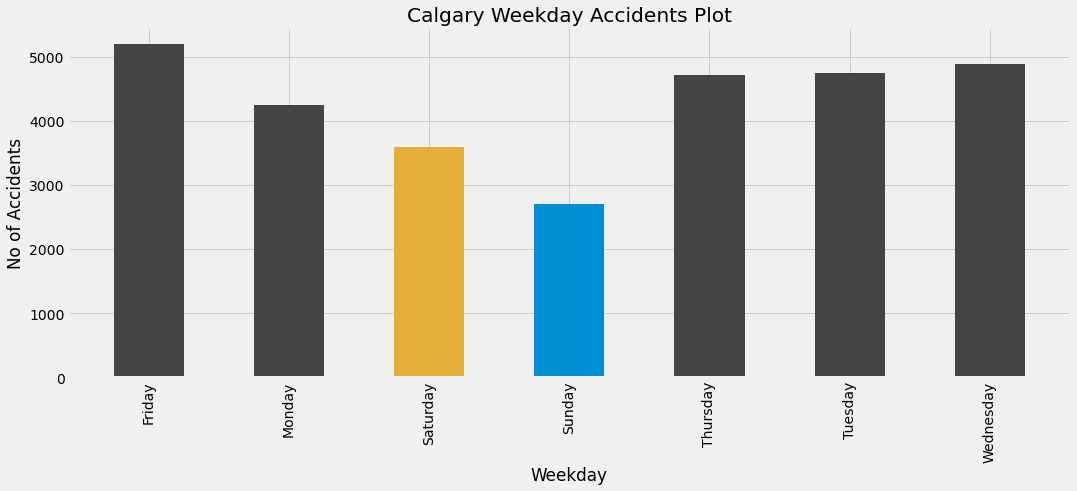

In [9]:
accidents_dayofweek_df = traffic_incidents_df.groupby(traffic_incidents_df['START_DT'].dt.day_name())['INCIDENT INFO'].count()
accidents_dayofweek_df.index.names = ['Weekday']
print(accidents_dayofweek_df)

colors = []
for val in accidents_dayofweek_df.tolist():
    if val < 3000:colors.append('#008fd5')#444444 #238823
    elif val > 4000:colors.append('#444444')#008fd5 #D2222D
    else:colors.append('#e5ae38')#e5ae38 #FFBF00
        
barplot(x_list = accidents_dayofweek_df.index,
        y_list = accidents_dayofweek_df,
        x_label = "Weekday", y_label = "No of Accidents",
        title = "Calgary Weekday Accidents Plot",
        colors = colors)

### Explanation
Above plot shows the number of accidents taking place every day of the week. Y-Axis shows total number of accidents and X-Axis shows weekday. The lowest accidents take place on Sunday, indicating Sundays are the safest to drive. This is followed by Saturday, while the rest of the week have similar accident pattern with the maximum being on Friday, with as many as 5000 accidents. This observation shows that more accidents are likely to happen on weekdays when majority of people are commuting between workplace and home compare to the same on weekend.

### plot the hourly trend between weekdays and weekends and explain your observation ( 8 pts: 6 pts code and 2 pts your observation)

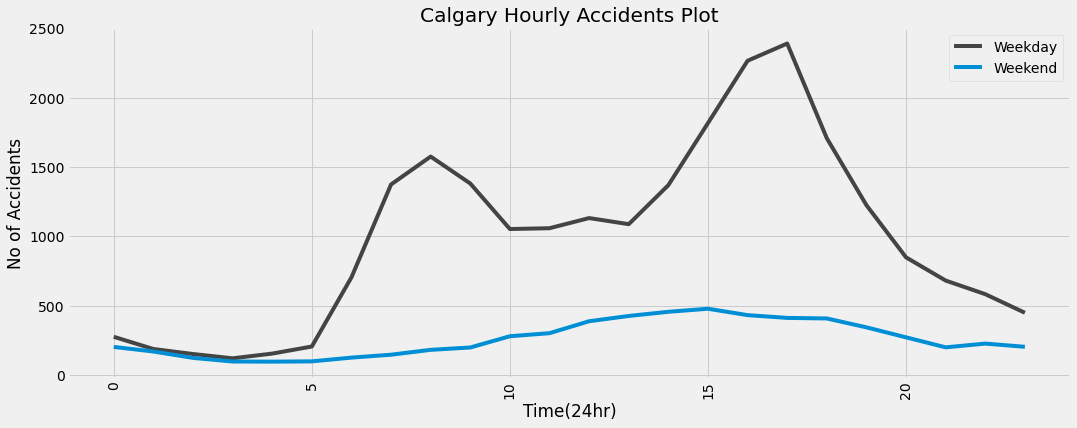

In [10]:
weekday_df = traffic_incidents_df.loc[(traffic_incidents_df['START_DT'].dt.day_name() != 'Sunday') & 
                                      (traffic_incidents_df['START_DT'].dt.day_name() != 'Saturday')]
weekend_df = traffic_incidents_df.loc[(traffic_incidents_df['START_DT'].dt.day_name() == 'Sunday') | 
                                      (traffic_incidents_df['START_DT'].dt.day_name() == 'Saturday')]
accidents_byhour_weekday_df = weekday_df.groupby(traffic_incidents_df['START_DT'].dt.hour)['INCIDENT INFO'].count()
accidents_byhour_weekend_df = weekend_df.groupby(traffic_incidents_df['START_DT'].dt.hour)['INCIDENT INFO'].count()

    
lineplotMultiple(x_list = accidents_byhour_weekday_df.index,
                 y_list1 = accidents_byhour_weekday_df,
                 y_list2 = accidents_byhour_weekend_df,
                 x_label = "Time(24hr)", y_label = "No of Accidents",
                 title = "Calgary Hourly Accidents Plot",
                 label = ['Weekday', 'Weekend'])

### Explanation
This plot compares the accident patterns on weekdays with weekends on a daily (24 hour) basis. The weekday’s curve is same as discussed above, which makes it quite hard to predict the number of accidents per hour, while the weekend’s curve is much more stable and seems to follow a pattern, thus making it easier to predict the number of accidents per hour. Above graphs shows that on weekday more accidents occures in morning and evening rush hours while on weekend this trend is not observed.   

# Merging Datasets

### Load Daily weather data (weather.csv) (1 pts)

In [11]:
weather_df = pd.read_csv('weather.csv')
weather_df['date']=pd.to_datetime(weather_df['date'])

### Extract maximum/minimum temperature and drop Null values (1 pts)

In [12]:
print("Maximum Temperature: ", weather_df['max_temperature'].max(), 'C')
print("Minimum Temperature: ", weather_df['min_temperature'].min(), 'C')

weather_df = weather_df[['date', 'avg_temperature']].drop_duplicates().reset_index(drop=True).dropna()
weather_df.set_index('date', inplace=True)
print(weather_df)

Maximum Temperature:  36.5 C
Minimum Temperature:  -32.9 C
            avg_temperature
date                       
2022-04-02             4.84
2022-04-01             2.95
2022-03-31             4.25
2022-03-30             7.10
2022-03-29             1.95
...                     ...
2014-01-19             2.29
2014-01-18             4.30
2014-01-17             4.65
2014-01-16             2.90
2014-01-15             4.34

[3000 rows x 1 columns]


### Add the following daily features and create your feature matrix: (10 pts)
* X: Weekdays, average daily temperature
* Y: Total number of accidents in that day

In [13]:
feature_df=pd.merge(weather_df,daily_accident_count_df, how='inner', left_index=True, right_index=True)
feature_df.columns = ['Avg Temperature', 'Accident Count']
# print(feature_df)

def label_row(date, dayname):
    if pd.to_datetime(date).day_name() == dayname: return 1
    else: return 0
# print(label_row(feature_df.index.values[0],"Saturday"))
# df['race_label'] = df.apply (lambda row: label_race(row), axis=1)

feature_df['Mon'] = feature_df.apply (lambda row: label_row(row.name, 'Monday'), axis=1)
feature_df['Tue'] = feature_df.apply (lambda row: label_row(row.name, 'Tuesday'), axis=1)
feature_df['Wed'] = feature_df.apply (lambda row: label_row(row.name, 'Wednesday'), axis=1)
feature_df['Thu'] = feature_df.apply (lambda row: label_row(row.name, 'Thursday'), axis=1)
feature_df['Fri'] = feature_df.apply (lambda row: label_row(row.name, 'Friday'), axis=1)
feature_df['Sat'] = feature_df.apply (lambda row: label_row(row.name, 'Saturday'), axis=1)
feature_df['Sun'] = feature_df.apply (lambda row: label_row(row.name, 'Sunday'), axis=1)
print(feature_df)

X = feature_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Avg Temperature']]
Y = feature_df['Accident Count']

# print(X)
# print(Y)

            Avg Temperature  Accident Count  Mon  Tue  Wed  Thu  Fri  Sat  Sun
2022-04-02             4.84              11    0    0    0    0    0    1    0
2022-04-01             2.95              15    0    0    0    0    1    0    0
2022-03-31             4.25              18    0    0    0    1    0    0    0
2022-03-30             7.10              11    0    0    1    0    0    0    0
2022-03-29             1.95              19    0    1    0    0    0    0    0
...                     ...             ...  ...  ...  ...  ...  ...  ...  ...
2016-12-10           -20.95              40    0    0    0    0    0    1    0
2016-12-09           -22.29              41    0    0    0    0    1    0    0
2016-12-08           -23.25              27    0    0    0    1    0    0    0
2016-12-07           -21.80              24    0    0    1    0    0    0    0
2016-12-06           -19.79              11    0    1    0    0    0    0    0

[1787 rows x 9 columns]


### Create your model and use linearRegression class in sklearn for prediction (3 pts)

In [14]:
model = LinearRegression(fit_intercept=False)
model.fit(X,Y)
feature_df['Predicted'] = model.predict(X)
print(feature_df)

            Avg Temperature  Accident Count  Mon  Tue  Wed  Thu  Fri  Sat  \
2022-04-02             4.84              11    0    0    0    0    0    1   
2022-04-01             2.95              15    0    0    0    0    1    0   
2022-03-31             4.25              18    0    0    0    1    0    0   
2022-03-30             7.10              11    0    0    1    0    0    0   
2022-03-29             1.95              19    0    1    0    0    0    0   
...                     ...             ...  ...  ...  ...  ...  ...  ...   
2016-12-10           -20.95              40    0    0    0    0    0    1   
2016-12-09           -22.29              41    0    0    0    0    1    0   
2016-12-08           -23.25              27    0    0    0    1    0    0   
2016-12-07           -21.80              24    0    0    1    0    0    0   
2016-12-06           -19.79              11    0    1    0    0    0    0   

            Sun  Predicted  
2022-04-02    0  13.939888  
2022-04-01    0  

### plot and compare your prediction with real accident data (3 pts)

            Actual Accident Count  Predicted Accident Count
2022-04-02                     11                 13.939888
2022-04-01                     15                 20.707763
2022-03-31                     18                 18.376145
2022-03-30                     11                 18.298982
2022-03-29                     19                 18.864185
...                           ...                       ...
2016-12-10                     40                 19.590508
2016-12-09                     41                 26.237877
2016-12-08                     27                 24.401428
2016-12-07                     24                 24.631006
2016-12-06                     11                 23.627445

[1787 rows x 2 columns]


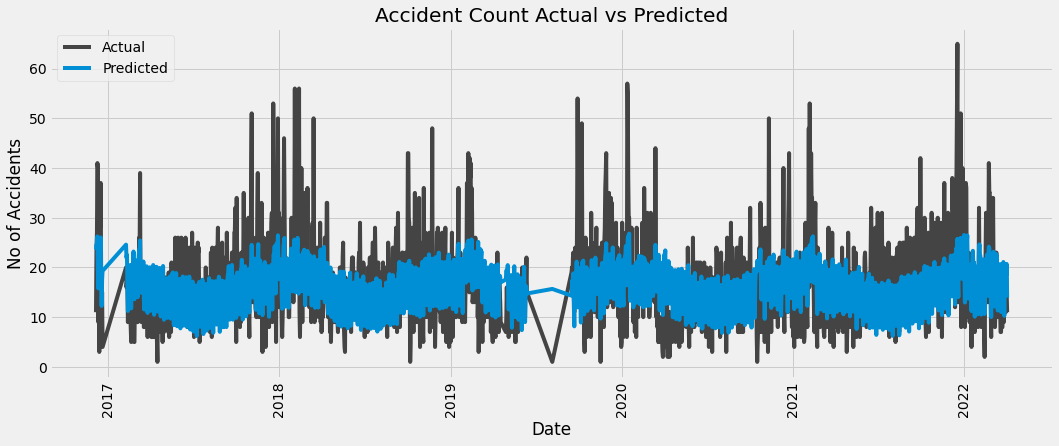

In [15]:
output_df = feature_df[['Accident Count', 'Predicted']]
output_df.columns = ['Actual Accident Count', 'Predicted Accident Count']
print(output_df)
lineplotMultiple(x_list = output_df.index,
                 y_list1 = output_df['Actual Accident Count'],
                 y_list2 = output_df['Predicted Accident Count'],
                 x_label = "Date", y_label = "No of Accidents",
                 title = "Accident Count Actual vs Predicted",
                 label = ['Actual', 'Predicted'])